In [1]:
setwd ("/bin/Exam_Calogero_MG")

In [2]:
file_path = "/bin/Exam_Calogero_MG/GSE193258_RNAseq_estimated_counts.tsv"


In [3]:
data = read.table(file_path, sep = "\t", header = TRUE)


In [4]:
# Output the imported data
head(data)
class(data)
samples = data.frame(data[,c(1,32,33,34,41,42,43)], row.names = rownames(data))
row_names_genes = data$gene
head(samples)
samples_no_gene = data.frame(data[,c(32,33,34,41,42,43)], row.names = rownames(data))
rownames(samples_no_gene) = row_names_genes
head(samples_no_gene)

,gene,HCC2935_DMSO_1,HCC2935_DMSO_2,HCC2935_DMSO_3,HCC2935_long_wash_1,HCC2935_long_wash_2,HCC2935_long_wash_3,HCC2935_short_wash_1,HCC2935_short_wash_2,HCC2935_short_wash_3,⋯,PC9_osi_acute_3,PC9_short_wash_1,PC9_short_wash_2,PC9_short_wash_3,PC9_long_wash_1,PC9_long_wash_2,PC9_long_wash_3,PC9_osi_DTP_1,PC9_osi_DTP_2,PC9_osi_DTP_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,0.5682648,5.155194,2.477012,9.3825599,3.756897,3.657931,5.181001,5.0955982,6.029939,⋯,5.8535371,12.9978395,18.8865019,18.044952,7.8021925,5.553602,14.145045,19.4726655,54.6598821,16.444272
2,A1CF,1.6903967,5.044475,0.000000,0.8530669,16.372231,12.806211,8.635351,4.2878568,3.360871,⋯,2.4764460,5.7916972,13.2814493,7.481299,7.4124338,6.699701,6.749110,14.1457653,7.4760577,9.132462
3,A2M,4.5918067,0.000000,0.000000,0.0000000,13.573063,0.000000,0.000000,0.3701051,0.000000,⋯,0.3590596,0.0000000,11.8258773,8.320874,4.1530829,3.384917,9.265192,0.3616485,33.3906184,7.940929
4,A2ML1,10.9928384,23.050205,26.685158,22.3528821,20.365509,24.832785,21.161743,17.8441506,7.263028,⋯,244.6464245,548.4148524,521.5107147,646.430287,133.8276411,125.312795,515.226738,723.9662025,993.4183288,912.677045
5,A3GALT2,1.0240799,0.000000,0.000000,0.0000000,0.000000,5.150755,0.000000,0.0000000,0.000000,⋯,0.9640867,0.9598506,0.9634092,0.971106,0.9544674,0.000000,0.000000,2.8911717,0.9671412,2.889548
6,A4GALT,443.9211845,480.966346,449.169540,331.2582223,357.440237,272.281982,328.083888,319.5509843,265.040712,⋯,1424.6011545,2082.8428844,2270.7910738,2807.879156,1053.7736860,1097.736260,2337.103769,2322.4511546,3057.6903855,2822.636641


[1] "data.frame"

,gene,H1975_DMSO_1,H1975_DMSO_2,H1975_DMSO_3,H1975_osi_DTP_1,H1975_osi_DTP_2,H1975_osi_DTP_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,788.8477841,436.0194563,624.1128152,888.7190056,851.905787,850.062314
2,A1CF,5.9176652,12.3258496,0.8429555,0.8579344,8.969218,9.416306
3,A2M,0.3681615,0.7309377,0.0000000,124.1034271,44.935687,21.881597
4,A2ML1,10.0186959,38.1575548,17.7310213,10.8636700,12.917684,18.431924
5,A3GALT2,1.0000591,0.9945132,2.9958185,2.0160282,3.036452,3.039603
6,A4GALT,564.3877865,340.1630090,409.8402777,668.9767513,655.724842,631.619819


,H1975_DMSO_1,H1975_DMSO_2,H1975_DMSO_3,H1975_osi_DTP_1,H1975_osi_DTP_2,H1975_osi_DTP_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,788.8477841,436.0194563,624.1128152,888.7190056,851.905787,850.062314
A1CF,5.9176652,12.3258496,0.8429555,0.8579344,8.969218,9.416306
A2M,0.3681615,0.7309377,0.0000000,124.1034271,44.935687,21.881597
A2ML1,10.0186959,38.1575548,17.7310213,10.8636700,12.917684,18.431924
A3GALT2,1.0000591,0.9945132,2.9958185,2.0160282,3.036452,3.039603
A4GALT,564.3877865,340.1630090,409.8402777,668.9767513,655.724842,631.619819


In [5]:
#Data normalization
m1=as.matrix(samples_no_gene, rownames.force=NA)
class(m1)
head(m1)
#I load the library
#install.packages("BiocManager")
#BiocManager::install("edgeR")

library(edgeR)

[1] "matrix" "array"

,H1975_DMSO_1,H1975_DMSO_2,H1975_DMSO_3,H1975_osi_DTP_1,H1975_osi_DTP_2,H1975_osi_DTP_3
A1BG,788.8477841,436.0194563,624.1128152,888.7190056,851.905787,850.062314
A1CF,5.9176652,12.3258496,0.8429555,0.8579344,8.969218,9.416306
A2M,0.3681615,0.7309377,0.0000000,124.1034271,44.935687,21.881597
A2ML1,10.0186959,38.1575548,17.7310213,10.8636700,12.917684,18.431924
A3GALT2,1.0000591,0.9945132,2.9958185,2.0160282,3.036452,3.039603
A4GALT,564.3877865,340.1630090,409.8402777,668.9767513,655.724842,631.619819


Loading required package: limma



In [6]:
cpm_m1 = edgeR::cpm(m1)
#I save the results into a txt file
write.table(cpm_m1, file = "H1975_cells_cpm.txt", sep ="\t", col.names=NA)
head(cpm_m1)

,H1975_DMSO_1,H1975_DMSO_2,H1975_DMSO_3,H1975_osi_DTP_1,H1975_osi_DTP_2,H1975_osi_DTP_3
A1BG,16.595225463,10.28022483,14.54158901,20.17025642,17.3383875,20.58156499
A1CF,0.124491683,0.29061204,0.01964054,0.01947157,0.1825457,0.22798601
A2M,0.007745124,0.01723364,0.00000000,2.81663600,0.9145522,0.52979352
A2ML1,0.210766286,0.89965766,0.41312599,0.24656051,0.2629068,0.44627064
A3GALT2,0.021038540,0.02344808,0.06980142,0.04575553,0.0617993,0.07359435
A4GALT,11.873193732,8.02017470,9.54912114,15.18301345,13.3456206,15.29267223


In [7]:
#Data visualization (PCA)
samples_2= read.table("H1975_cells_cpm.txt", sep="\t", header = TRUE, row.names=1)
samples_2 = log2(samples_2+1)
pca = prcomp(t(samples_2))
summary(pca)

Importance of components:
                           PC1     PC2      PC3      PC4     PC5       PC6
Standard deviation     50.3945 16.3950 11.98016 10.32848 8.41077 1.367e-13
Proportion of Variance  0.8115  0.0859  0.04586  0.03409 0.02261 0.000e+00
Cumulative Proportion   0.8115  0.8974  0.94330  0.97739 1.00000 1.000e+00

In [8]:
#Scree plot
variance_pca =  pca$sdev^2
percentage_var_pca = round(variance_pca/sum(variance_pca)*100, 1)
head(pca$x)
pdf("H1975_cells_screeplot.pdf")
scree_plot = barplot(percentage_var_pca, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation", ylim = c(0,100))
dev.off()

,PC1,PC2,PC3,PC4,PC5,PC6
H1975_DMSO_1,-52.97515,18.241784,-2.459494,-0.7371208,-11.2100621,9.443715e-14
H1975_DMSO_2,-33.32743,-25.715923,9.868506,7.1839347,-2.7477227,8.232128e-14
H1975_DMSO_3,-49.23097,5.311382,-2.597891,-3.4385762,14.4447404,6.484539e-13
H1975_osi_DTP_1,48.05740,5.096384,-10.506137,15.8574338,1.5599939,-3.708749e-13
H1975_osi_DTP_2,33.20917,-13.537976,-12.657981,-13.9047952,-2.9353429,-1.100613e-13
H1975_osi_DTP_3,54.26698,10.604349,18.352997,-4.9608764,0.8883935,-3.010840e-13


png 
  2

In [9]:
#install.packages("ggplot2")
library(ggplot2)
table_pc1_pc2 = data.frame(Sample=rownames(pca$x),
                            PC1=pca$x[,1],
                            PC2=pca$x[,2])
dim(table_pc1_pc2) 
head(table_pc1_pc2)

pdf("H1975_cells_pca.pdf")
ggplot(data=table_pc1_pc2, aes(x=PC1, y=PC2, color=Sample)) +
  geom_point() +
  scale_color_manual(labels = c(rep("treated",3), rep("ctrl",3)), 
                     values = c(rep("violetred",3), rep("cyan3",3))) +
  xlab(paste("PC1 - ", percentage_var_pca[1], "%", sep="")) +
  ylab(paste("PC2 - ", percentage_var_pca[2], "%", sep="")) +
  ggtitle("PCA H1975")
dev.off()

[1] 6 3

,Sample,PC1,PC2
,<chr>,<dbl>,<dbl>
H1975_DMSO_1,H1975_DMSO_1,-52.97515,18.241784
H1975_DMSO_2,H1975_DMSO_2,-33.32743,-25.715923
H1975_DMSO_3,H1975_DMSO_3,-49.23097,5.311382
H1975_osi_DTP_1,H1975_osi_DTP_1,48.05740,5.096384
H1975_osi_DTP_2,H1975_osi_DTP_2,33.20917,-13.537976
H1975_osi_DTP_3,H1975_osi_DTP_3,54.26698,10.604349


png 
  2

In [10]:
#Which genes contribute more to the PC1?
loading_scores_pc1 = pca$rotation[,1]
gene_scores_pc1 = abs(loading_scores_pc1) 
ranking_genes_pc1 = sort(gene_scores_pc1, decreasing=TRUE)
genes_names_pc1_top10 = names(ranking_genes_pc1[1:10])
genes_names_pc1_top10

genes_pc1_top10 = pca$rotation[genes_names_pc1_top10,1]
genes_pc1_top10
write.table(genes_pc1_top10, file = "H1975_cells_top10genes_pc1.txt", sep ="\t", col.names=NA)


[1] "ESRP1"   "CDH1"    "LAD1"    "MAL2"    "VGF"     "TMEM30B" "CNN1"   
 [8] "EDN2"    "MYEOV"   "RTL1"

ESRP1        CDH1        LAD1        MAL2         VGF     TMEM30B 
-0.06005589 -0.05344399 -0.05250367 -0.04900915 -0.04752402 -0.04704192 
       CNN1        EDN2       MYEOV        RTL1 
 0.04696674  0.04666839 -0.04592492 -0.04494660

In [11]:
#Which genes contribute more to the PC2?
loading_scores_pc2 = pca$rotation[,2]
gene_scores_pc2 = abs(loading_scores_pc2) #why do we have to consider the absolute value?
ranking_genes_pc2 = sort(gene_scores_pc2, decreasing=TRUE)
genes_names_pc2_top10 = names(ranking_genes_pc2[1:10])
genes_names_pc2_top10

genes_pc2_top10 = pca$rotation[genes_names_pc2_top10,1]
genes_pc2_top10
write.table(genes_pc2_top10, file = "H1975_cells_top10genes_pc2.txt", sep ="\t", col.names=NA)


[1] "FOS"        "PLCB4"      "ANXA8L1"    "ANXA8"      "AL035078.4"
 [6] "SERPINA5"   "CXCR5"      "PLXNA4"     "PLEKHS1"    "CCN5"

FOS        PLCB4      ANXA8L1        ANXA8   AL035078.4     SERPINA5 
-0.026921227  0.005519681 -0.025249216 -0.025650955  0.011506603 -0.022491680 
       CXCR5       PLXNA4      PLEKHS1         CCN5 
 0.009983291 -0.023128482  0.022257420  0.031728777

In [12]:
library("DESeq2")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading require

In [13]:
samples_experiment = samples_no_gene
samples_experiment = as.data.frame(lapply(samples_experiment, as.integer))
samples_experiment_matrix = as.matrix(samples_experiment)
class(samples_experiment_matrix)
coldata = data.frame(samples = dimnames(samples_experiment)[[2]], condition=factor(c(rep("ctrl",3), rep("treat",3))))
dds = DESeqDataSetFromMatrix(countData = samples_experiment_matrix, colData = coldata, design = ~ condition)
dds=DESeq(dds)
res=results(dds)
summary(res)
res_diff_expr = as.data.frame(res)
class(res_diff_expr)
gene_name = samples[,"gene", drop = FALSE]
res_diff_expr = cbind(gene_name, res_diff_expr)
res_diff_expr = res_diff_expr[!is.na(res_diff_expr$log2FoldChange),]
res_diff_expr = res_diff_expr[which((res_diff_expr$padj<=0.05) &(abs(res_diff_expr$log2FoldChange)>=1)),]
head(res_diff_expr)

[1] "matrix" "array"

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 17723 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3906, 22%
LFC < 0 (down)     : 4095, 23%
outliers [1]       : 4, 0.023%
low counts [2]     : 1025, 5.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



[1] "data.frame"

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,A2M,31.19067,8.406729,1.4061637,5.978485,2.252219e-09,2.435139e-08
14,AADAT,519.24891,-1.185638,0.1758240,-6.743319,1.548084e-11,2.373160e-10
17,AAMDC,443.60869,1.354595,0.2163098,6.262289,3.793659e-10,4.656717e-09
19,AANAT,43.91813,-3.340325,0.5007026,-6.671275,2.535904e-11,3.779855e-10
27,AASS,95.45950,3.027056,0.4494267,6.735371,1.635122e-11,2.504287e-10
30,ABAT,417.24621,1.405086,0.2461975,5.707149,1.148844e-08,1.079280e-07


Saving 6.67 x 6.67 in image


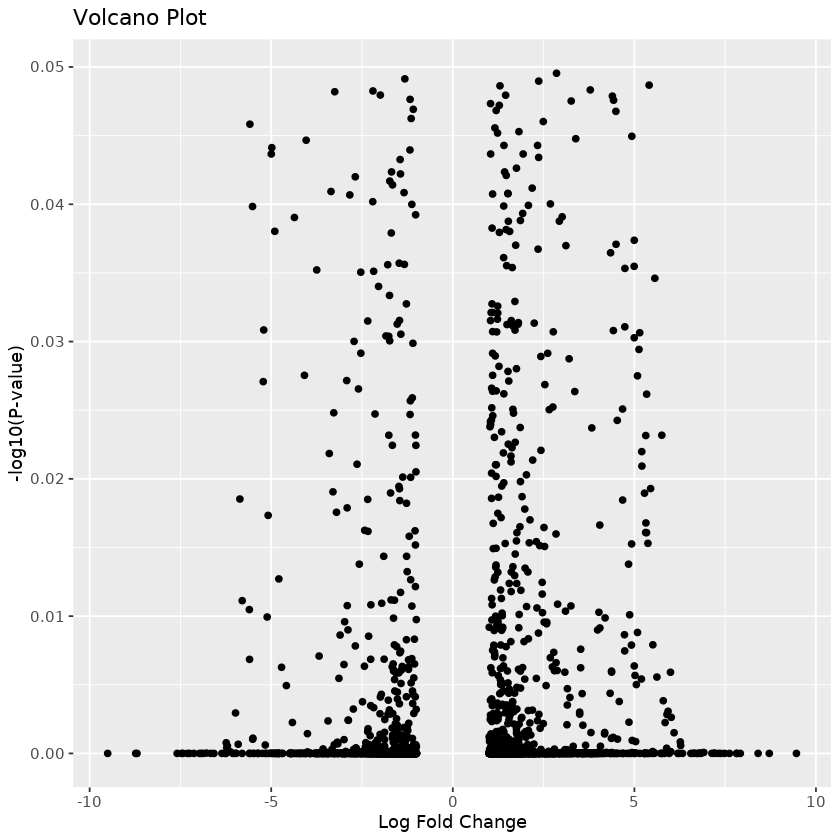

In [14]:
library(ggplot2)
ggplot(res_diff_expr, aes(x = log2FoldChange, y = padj)) +
  geom_point() +
  labs(title = "Volcano Plot", x = "Log Fold Change", y = "-log10(P-value)")
ggsave(filename="H1975_volcano_plot.pdf")


In [17]:
#Enriched functional features
gene_name = res_diff_expr$gene
gene_name = as.data.frame(gene_name)
write.table(gene_name, file = "gene_name.txt", sep = "\t", row.names=FALSE)



In [19]:
#I perform the GO analysis on the positive data online
BiocManager::install("dplyr")
library(dplyr)
positive_genes <- dplyr::filter(res_diff_expr, log2FoldChange > 0)
positive_genes
pos_gene_name = positive_genes$gene
writeLines(pos_gene_name, "name_of_pos_genes.txt")


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.21.1), R 4.1.1 (2021-08-10)

Installing package(s) 'dplyr'

also installing the dependencies ‘generics’, ‘tidyselect’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'cpp11', 'spatial'


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    firs

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,A2M,31.190673,8.406729,1.4061637,5.978485,2.252219e-09,2.435139e-08
17,AAMDC,443.608695,1.354595,0.2163098,6.262289,3.793659e-10,4.656717e-09
27,AASS,95.459499,3.027056,0.4494267,6.735371,1.635122e-11,2.504287e-10
30,ABAT,417.246208,1.405086,0.2461975,5.707149,1.148844e-08,1.079280e-07
38,ABCA5,164.666413,2.581602,0.3354709,7.695459,1.409868e-14,3.430952e-13
43,ABCB1,4.342309,5.563711,2.2595590,2.462300,1.380493e-02,3.460873e-02
47,ABCB5,31.725968,5.957306,0.9898498,6.018394,1.761558e-09,1.932159e-08
60,ABCC6,173.678983,2.398690,0.2850361,8.415393,3.915787e-17,1.340309e-15
94,ABHD4,4650.252407,1.530740,0.2090339,7.322927,2.426203e-13,4.856480e-12


In [21]:
BiocManager::install("readxl")
library(readxl)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.21.1), R 4.1.1 (2021-08-10)

Installing package(s) 'readxl'

also installing the dependencies ‘rematch’, ‘hms’, ‘prettyunits’, ‘cellranger’, ‘progress’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'cpp11', 'spatial'



In [22]:
pos_GO_data = read_excel("/bin/Exam_Calogero_MG/GOanalysis_pos_data.xltx")

In [23]:
pos_GO_data = as.data.frame(pos_GO_data)

In [24]:
pos_GO_data$`raw P-value`=as.numeric(pos_GO_data$`raw P-value`)
class(pos_GO_data$`raw P-value`)
ggplot1_data = data.frame(pos_GO_data$`GO biological process complete`[1:20], pos_GO_data$`fold Enrichment`[1:20],-log(pos_GO_data$`raw P-value`[1:20]))
colnames(ggplot1_data) = c("biological_process", "fold_enrichment", "log_p_value")

[1] "numeric"

In [25]:
library(ggplot2)

Saving 6.67 x 6.67 in image


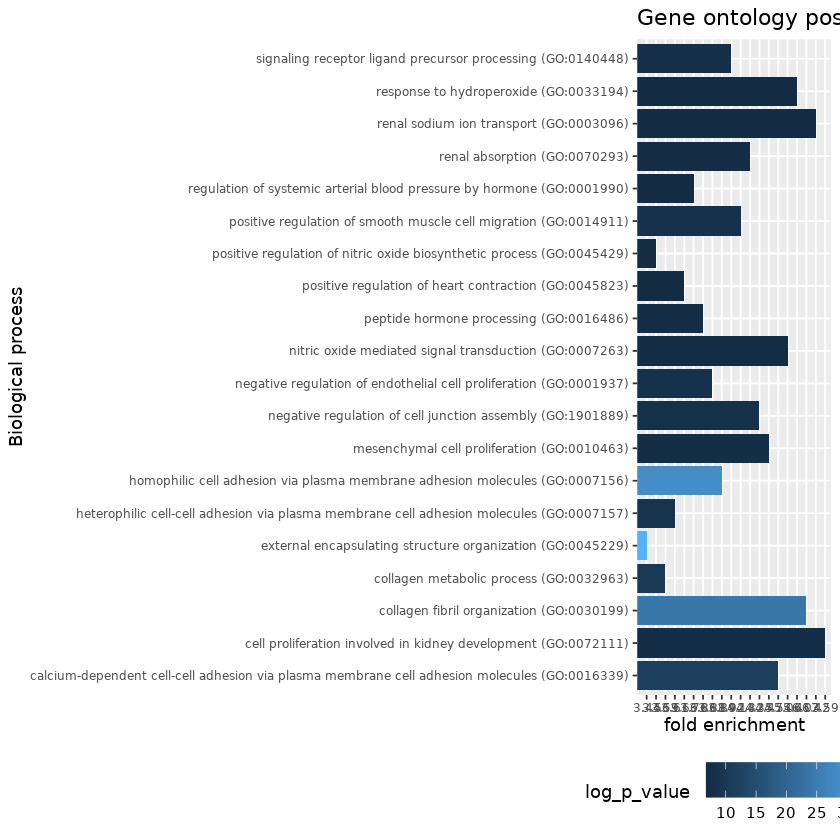

In [27]:
ggplot(ggplot1_data) + 
  geom_bar(stat = "identity", 
           aes(y=fold_enrichment,x=biological_process, fill=log_p_value)) +
  labs(fill="log_p_value") +
  theme(legend.position =c("bottom"),
        legend.box="horizontal", 
        legend.text = element_text(size = 9),
        legend.key.height = unit(0.75, "cm"),
        legend.key.width = unit(0.75, "cm"),
        axis.text=element_text(size=7)) +
  scale_x_discrete() +
  labs(title="Gene ontology posdata", 
       y="fold enrichment", 
       x="Biological process") + 
  coord_flip()
ggsave(filename="H1975_GOposdata.pdf")

In [28]:
negative_genes <- dplyr::filter(res_diff_expr, log2FoldChange < 0)
negative_genes
dim(negative_genes)
neg_gene_name = negative_genes$gene
writeLines(neg_gene_name, "name_of_neg_genes.txt")

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,AADAT,519.248909,-1.185638,0.1758240,-6.743319,1.548084e-11,2.373160e-10
19,AANAT,43.918128,-3.340325,0.5007026,-6.671275,2.535904e-11,3.779855e-10
33,ABCA12,92.739377,-4.903164,0.6854921,-7.152765,8.504719e-13,1.586344e-11
34,ABCA13,42.761190,-1.775784,0.5458523,-3.253232,1.141003e-03,3.876253e-03
57,ABCC3,1939.574960,-1.546003,0.2868925,-5.388789,7.093389e-08,5.756784e-07
72,ABCG2,1244.421607,-1.590914,0.2071253,-7.680926,1.579432e-14,3.815779e-13
78,ABHD11,1185.216478,-1.760495,0.1779762,-9.891742,4.520896e-23,2.936647e-21
108,ABO,58.444180,-1.632226,0.5552213,-2.939775,3.284506e-03,9.852927e-03
130,AC003688.2,24.470584,-3.464717,0.7982895,-4.340176,1.423684e-05,7.429505e-05


[1] 1324    7

In [29]:
neg_GO_data = read_excel("GOanalysis_neg_data.xltx")
neg_GO_data = as.data.frame(neg_GO_data)
neg_GO_data$`raw P-value`=as.numeric(neg_GO_data$`raw P-value`)
class(neg_GO_data$`raw P-value`)
ggplot2_data = data.frame(neg_GO_data$`GO biological process complete`[1:20], neg_GO_data$`fold Enrichment`[1:20],-log(neg_GO_data$`raw P-value`[1:20]))
colnames(ggplot2_data) = c("biological_process", "fold_enrichment", "log_p_value")

[1] "numeric"

Saving 6.67 x 6.67 in image


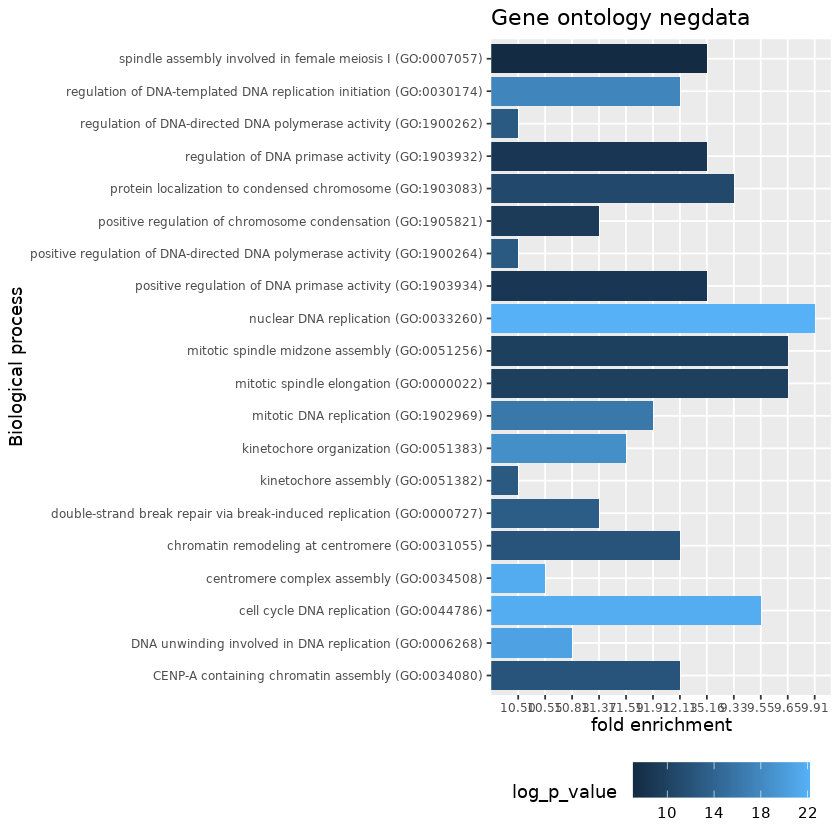

In [30]:
ggplot(ggplot2_data) + 
  geom_bar(stat = "identity", 
           aes(y=fold_enrichment,x=biological_process, fill=log_p_value)) +
  labs(fill="log_p_value") +
  theme(legend.position =c("bottom"),
        legend.box="horizontal", 
        legend.text = element_text(size = 9),
        legend.key.height = unit(0.75, "cm"),
        legend.key.width = unit(0.75, "cm"),
        axis.text=element_text(size=7)) +
  scale_x_discrete() +
  labs(title="Gene ontology negdata", 
       y="fold enrichment", 
       x="Biological process") + 
  coord_flip()
ggsave(filename="H1975_GOnegdata.pdf")

In [31]:
file_path = "/bin/Exam_Calogero_MG/GSM5777977_X2a_3519AZ_H1975_9291-NF_peaks.narrowPeak"
peaks = read.delim(file_path, header = FALSE, stringsAsFactors = FALSE)
pos_gene_name = positive_genes$gene
pos_gene_name = as.data.frame(pos_gene_name)
colnames(pos_gene_name)[colnames(pos_gene_name) == "pos_gene_name"] = "SYMBOL"

In [33]:
library(biomaRt)

In [37]:
ensembl <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")
pos_gene_info <- getBM(attributes = c("external_gene_name", "chromosome_name", "start_position", "end_position"),
                   filters = "external_gene_name",
                   values = pos_gene_name$SYMBOL,
                   mart = ensembl)
pos_genes_location<- merge(pos_gene_name, pos_gene_info, by.x = "SYMBOL", by.y = "external_gene_name")

Ensembl site unresponsive, trying useast mirror



In [38]:
write.table(pos_genes_location, file = "pos_genes_location.txt", sep = "\t", row.names=FALSE)
pos_genes_location = read.table("pos_genes_location.txt", sep="\t", header = TRUE)

In [39]:
neg_gene_name = negative_genes$gene
neg_gene_name = as.data.frame(neg_gene_name)
colnames(neg_gene_name)[colnames(neg_gene_name) == "neg_gene_name"] = "SYMBOL"

In [40]:
ensembl <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")
neg_gene_info <- getBM(attributes = c("external_gene_name", "chromosome_name", "start_position", "end_position"),
                       filters = "external_gene_name",
                       values = neg_gene_name$SYMBOL,
                       mart = ensembl)
neg_genes_location<- merge(neg_gene_name, neg_gene_info, by.x = "SYMBOL", by.y = "external_gene_name")


Ensembl site unresponsive, trying useast mirror



In [41]:
write.table(neg_genes_location, file = "neg_genes_location.txt", sep = "\t", row.names=FALSE)
neg_genes_location = read.table("neg_genes_location.txt", sep="\t", header = TRUE)


In [42]:
osi1_peaks = subset(peaks, select = c("V1", "V2", "V3", "V4"))
colnames(osi1_peaks)[colnames(osi1_peaks) == "V1"] = "Chr"
colnames(osi1_peaks)[colnames(osi1_peaks) == "V2"] = "startPeak"
colnames(osi1_peaks)[colnames(osi1_peaks) == "V3"] = "endPeak"
colnames(osi1_peaks)[colnames(osi1_peaks) == "V4"] = "namePeak"

In [43]:
library(GenomicRanges)

In [44]:
gene_regions_pos <- GRanges(
  seqnames = rep("ArtificialChromosome", length(pos_genes_location$start_position)),
  ranges = IRanges(pos_genes_location$start_position, pos_genes_location$end_position)
)
open_chromatin_regions_1 <- GRanges(
  seqnames = rep("ArtificialChromosome", length(osi1_peaks$startPeak)),
  ranges = IRanges(osi1_peaks$startPeak, osi1_peaks$endPeak)
)

In [45]:
#Overlap analysis
overlap_pos_1 <- findOverlaps(gene_regions_pos, open_chromatin_regions_1)
pos_overlapping_indices_1 <- subjectHits(overlap_pos_1)
pos_overlapping_name_1 = pos_genes_location$SYMBOL[pos_overlapping_indices_1]
pos_overlapping_name_1 = as.data.frame(pos_overlapping_name_1)
pos_overlapping_name_1 <- subset(pos_overlapping_name_1, pos_overlapping_name_1 != "NA")
head(pos_overlapping_name_1)


,pos_overlapping_name_1
,<chr>
1,SAMD12
2,SAMD4A
3,SARDH
4,SARM1
5,SAT2
6,SATB1


In [46]:
gene_regions_neg <- GRanges(
  seqnames = rep("ArtificialChromosome", length(neg_genes_location$start_position)),
  ranges = IRanges(neg_genes_location$start_position, neg_genes_location$end_position)
)


open_chromatin_regions_1 <- GRanges(
  seqnames = rep("ArtificialChromosome", length(osi1_peaks$startPeak)),
  ranges = IRanges(osi1_peaks$startPeak, osi1_peaks$endPeak)
)

In [47]:
#Overlap analysis
overlap_neg_1 <- findOverlaps(gene_regions_neg, open_chromatin_regions_1)
neg_overlapping_indices_1 <- subjectHits(overlap_neg_1)

neg_overlapping_name_1 = neg_genes_location$SYMBOL[neg_overlapping_indices_1]
neg_overlapping_name_1 = as.data.frame(neg_overlapping_name_1)
neg_overlapping_name_1 <- subset(neg_overlapping_name_1, neg_overlapping_name_1 != "NA")

head(neg_overlapping_name_1)

,neg_overlapping_name_1
,<chr>
4336,RNASEH2A
4337,RNASEH2B
4514,SEMA7A
5777,CT45A1
5778,CT45A2
5779,CT45A5


In [49]:
#Plot genes that overlap  
overlap_positive_1 <- 1576
overlap_negative_1 = 807

total_genes_DE = 2778

prop_overlap_pos_1 <- overlap_positive_1 / total_genes_DE
prop_overlap_neg_1 <- overlap_negative_1 / total_genes_DE

proportions_1 <- data.frame(
  Category = c("Overlapping_POS", "Overlapping_NEG"),
  Proportion = c(prop_overlap_pos_1, prop_overlap_neg_1)
)

# Create the bar plot
png("barplot_overlap_sample_1.png", width = 5000, height = 3000, res = 400)
barplot(proportions_1$Proportion, names.arg = proportions_1$Category, 
        xlab = "Category", ylab = "Proportion", main = "Gene Overlap sample 1",
        col = c("yellow1","coral"), ylim = c(0, max(proportions_1$Proportion) * 1.2))
dev.off()

png 
  2

In [53]:
#Sample 2
file_path = "/bin/Exam_Calogero_MG/GSM5777978_X2b_3519AZ_H1975_9291-NF_peaks.narrowPeak"
peaks_2 = read.delim(file_path, header = FALSE, stringsAsFactors = FALSE)
osi2_peaks = subset(peaks_2, select = c("V1", "V2", "V3", "V4"))
colnames(osi2_peaks)[colnames(osi2_peaks) == "V1"] = "Chr"
colnames(osi2_peaks)[colnames(osi2_peaks) == "V2"] = "startPeak"
colnames(osi2_peaks)[colnames(osi2_peaks) == "V3"] = "endPeak"
colnames(osi2_peaks)[colnames(osi2_peaks) == "V4"] = "namePeak"

In [54]:
gene_regions_pos <- GRanges(
  seqnames = rep("ArtificialChromosome", length(pos_genes_location$start_position)),
  ranges = IRanges(pos_genes_location$start_position, pos_genes_location$end_position)
)

# Create GRanges object for open chromatin peak regions with a single artificial chromosome label
open_chromatin_regions_2 <- GRanges(
  seqnames = rep("ArtificialChromosome", length(osi2_peaks$startPeak)),
  ranges = IRanges(osi2_peaks$startPeak, osi2_peaks$endPeak)
)

#Overlap analysis
overlap_pos_2 <- findOverlaps(gene_regions_pos, open_chromatin_regions_2)
pos_overlapping_indices_2 <- subjectHits(overlap_pos_2)
pos_overlapping_name_2 = pos_genes_location$SYMBOL[pos_overlapping_indices_2]
pos_overlapping_name_2 = as.data.frame(pos_overlapping_name_2)
pos_overlapping_name_2 <- subset(pos_overlapping_name_2, pos_overlapping_name_2 != "NA")
head(pos_overlapping_name_2)

,pos_overlapping_name_2
,<chr>
1,RAB37
2,RAB3IP
3,RAB40A
4,RAB9B
5,RADX
6,RAG1


In [55]:
gene_regions_neg <- GRanges(
  seqnames = rep("ArtificialChromosome", length(neg_genes_location$start_position)),
  ranges = IRanges(neg_genes_location$start_position, neg_genes_location$end_position)
)

open_chromatin_regions_2 <- GRanges(
  seqnames = rep("ArtificialChromosome", length(osi2_peaks$startPeak)),
  ranges = IRanges(osi2_peaks$startPeak, osi2_peaks$endPeak)
)

#Overlap analysis
overlap_neg_2 <- findOverlaps(gene_regions_neg, open_chromatin_regions_2)
neg_overlapping_indices_2 <- subjectHits(overlap_neg_2)

neg_overlapping_name_2 = neg_genes_location$SYMBOL[neg_overlapping_indices_2]
neg_overlapping_name_2 = as.data.frame(neg_overlapping_name_2)
neg_overlapping_name_2 <- subset(neg_overlapping_name_2, neg_overlapping_name_2 != "NA")
head(neg_overlapping_name_2)

,neg_overlapping_name_2
,<chr>
3012,KIAA1755
4268,PRR11
4269,PRR13
4270,PRR15
4463,RALB
4464,RANBP1


In [56]:
#Plot genes that overlap  
overlap_positive_2 <- 1519
overlap_negative_2 = 786

total_genes_DE = 2778

prop_overlap_pos_2 <- overlap_positive_2 / total_genes_DE
prop_overlap_neg_2 <- overlap_negative_2 / total_genes_DE

proportions_2 <- data.frame(
  Category = c("Overlapping_POS", "Overlapping_NEG"),
  Proportion = c(prop_overlap_pos_2, prop_overlap_neg_2)
)

# Create the bar plot
png("barplot_overlap_sample_2.png", width = 5000, height = 3000, res = 400)
barplot(proportions_2$Proportion, names.arg = proportions_2$Category, 
        xlab = "Category", ylab = "Proportion", main = "Gene Overlap sample 2",
        col = c("yellowgreen", "aquamarine3"), ylim = c(0, max(proportions_2$Proportion) * 1.2))
dev.off()

png 
  2

In [58]:
#SAMPLE 3
file_path = "/bin/Exam_Calogero_MG/GSM5777979_X2c_3519AZ_H1975_9291-NF_peaks.narrowPeak"
peaks_3 = read.delim(file_path, header = FALSE, stringsAsFactors = FALSE)

#POSITIVE GENES
osi3_peaks = subset(peaks_3, select = c("V1", "V2", "V3", "V4"))
colnames(osi3_peaks)[colnames(osi3_peaks) == "V1"] = "Chr"
colnames(osi3_peaks)[colnames(osi3_peaks) == "V2"] = "startPeak"
colnames(osi3_peaks)[colnames(osi3_peaks) == "V3"] = "endPeak"
colnames(osi3_peaks)[colnames(osi3_peaks) == "V4"] = "namePeak"
head(osi3_peaks)
dim(osi3_peaks)

,Chr,startPeak,endPeak,namePeak
,<chr>,<int>,<int>,<chr>
1,chr1,29315,29397,X2c_3519AZ_H1975_9291-NF_peak_1
2,chr1,184449,184519,X2c_3519AZ_H1975_9291-NF_peak_2
3,chr1,267956,268043,X2c_3519AZ_H1975_9291-NF_peak_3
4,chr1,586149,586231,X2c_3519AZ_H1975_9291-NF_peak_4
5,chr1,599132,599198,X2c_3519AZ_H1975_9291-NF_peak_5
6,chr1,629857,630011,X2c_3519AZ_H1975_9291-NF_peak_6


[1] 222948      4

In [59]:
library(GenomicRanges)
gene_regions_pos <- GRanges(
  seqnames = rep("ArtificialChromosome", length(pos_genes_location$start_position)),
  ranges = IRanges(pos_genes_location$start_position, pos_genes_location$end_position)
)

open_chromatin_regions_3 <- GRanges(
  seqnames = rep("ArtificialChromosome", length(osi3_peaks$startPeak)),
  ranges = IRanges(osi3_peaks$startPeak, osi3_peaks$endPeak)
)

#Overlap analysis
overlap_pos_3 <- findOverlaps(gene_regions_pos, open_chromatin_regions_3)

pos_overlapping_indices_3 <- subjectHits(overlap_pos_3)
pos_overlapping_name_3 = pos_genes_location$SYMBOL[pos_overlapping_indices_3]
pos_overlapping_name_3 = as.data.frame(pos_overlapping_name_3)
pos_overlapping_name_3 <- subset(pos_overlapping_name_3, pos_overlapping_name_3!= "NA")
head(pos_overlapping_name_3)

,pos_overlapping_name_3
,<chr>
1,RTL5
2,RTN4RL2
3,RTP3
4,RWDD2A
5,S100A2
6,S100A4


In [60]:
#Negative genes
gene_regions_neg <- GRanges(
  seqnames = rep("ArtificialChromosome", length(neg_genes_location$start_position)),
  ranges = IRanges(neg_genes_location$start_position, neg_genes_location$end_position)
)

open_chromatin_regions_3 <- GRanges(
  seqnames = rep("ArtificialChromosome", length(osi3_peaks$startPeak)),
  ranges = IRanges(osi3_peaks$startPeak, osi3_peaks$endPeak)
)

#Overlap analysis
overlap_neg_3 <- findOverlaps(gene_regions_neg, open_chromatin_regions_3)
neg_overlapping_indices_3 <- subjectHits(overlap_neg_3)
neg_overlapping_name_3 = neg_genes_location$SYMBOL[neg_overlapping_indices_3]
neg_overlapping_name_3 = as.data.frame(neg_overlapping_name_3)
neg_overlapping_name_3 <- subset(neg_overlapping_name_3, neg_overlapping_name_3 != "NA")
head(neg_overlapping_name_3)

,neg_overlapping_name_3
,<chr>
3131,KPNA7
3132,KREMEN2
4399,RECQL4
4400,REEP4
4401,RELL2
4584,RTL1


In [61]:
#Plot genes that overlap  
overlap_positive_3 <- 1500 
overlap_negative_3 = 774
total_genes_DE = 2778

prop_overlap_pos_3 <- overlap_positive_3 / total_genes_DE
prop_overlap_neg_3 <- overlap_negative_3 / total_genes_DE

proportions_3 <- data.frame(
  Category = c("Overlapping_POS", "Overlapping_NEG"),
  Proportion = c(prop_overlap_pos_3, prop_overlap_neg_3)
)

# Create the bar plot
png("barplot_overlap_sample_3.png", width = 5000, height = 3000, res = 400)
barplot(proportions_3$Proportion, names.arg = proportions_3$Category, 
        xlab = "Category", ylab = "Proportion", main = "Gene Overlap sample 3",
        col = c("hotpink", "turquoise3"), ylim = c(0, max(proportions_3$Proportion) * 1.2))
dev.off()

png 
  2